In [30]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import pandas as pd 
import sklearn
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from IPython.core.display import HTML
import geopandas as gpd
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
import sqlite3
conn = sqlite3.connect("Database_zipcode.db")
conn1 = sqlite3.connect("Database_orders.db")

In [2]:
customers = pd.read_csv('project_data_customer.csv',sep=';')
orderlines = pd.read_csv('project_data_orderlines.csv',sep=';')
products = pd.read_csv('project_data_products.csv',sep=';')
zipcode = pd.read_csv('zipcode.txt',sep='\t',encoding='ansi')
orders = pd.read_csv('project_data_orders.csv',sep=';',encoding='ISO-8859-1')

OGÓLNA ANALIZA MIESZKAŃCÓW USA

In [3]:
zipcode.head()

,state,zipcode,ZIPName,County,pctcnty,Fipco,FipCo2,pctState,AltZIPs,NaltZIPs,...,CashRenter,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750
0,36,11937,Springs NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,1417,0.959,60,0.041,1868,0,960,0.650,1289,0.873
1,36,11941,Eastport NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,149,0.914,14,0.086,1210,0,92,0.564,149,0.914
2,36,11940,East Moriches NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,479,0.976,12,0.024,1694,0,206,0.420,479,0.976
3,36,12435,Greenfield Park NY,Ulster NY,1.0,36111.0,NaN,1.0,NaN,0.0,...,0,0.000,19,1.000,0,0,0,0.000,0,0.000
4,36,12063,East Schodack NY,Rensselaer NY,1.0,36083.0,NaN,1.0,NaN,0.0,...,19,1.000,0,0.000,986,0,11,0.579,19,1.000


In [4]:
zipcode.describe()

,state,zipcode,pctcnty,Fipco,FipCo2,pctState,NaltZIPs,Latitude,Longitude,LandSQMI,...,CashRenter,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750
count,32989.000000,32989.000000,32845.000000,32845.000000,8904.000000,32845.000000,32845.000000,32989.000000,32989.000000,32989.000000,...,32989.000000,31141.000000,32989.000000,31141.000000,32989.000000,32989.000000,32989.000000,31141.000000,32989.000000,31141.000000
mean,29.726151,49860.474279,0.961570,29820.591506,30617.031334,0.999694,0.247313,38.917628,-91.114272,86.874265,...,1138.611325,0.826253,66.077693,0.173747,682.007760,252.075025,579.672254,0.375170,729.953136,0.395691
std,15.257236,27446.550091,0.097111,15265.708637,14591.563833,0.008226,0.993525,5.206401,15.078567,253.840653,...,2247.834976,0.212784,92.863856,0.212784,399.265697,434.231283,1202.792530,0.205041,1670.801772,0.300791
min,1.000000,1001.000000,0.273000,1001.000000,1001.000000,0.523000,0.000000,19.091222,-176.638613,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,27107.000000,0.995000,18057.000000,19059.000000,1.000000,0.000000,35.459018,-97.276708,9.080000,...,35.000000,0.771000,8.000000,0.033000,510.000000,0.000000,12.000000,0.253000,7.000000,0.138000
50%,30.000000,49839.000000,1.000000,30003.000000,29160.000000,1.000000,0.000000,39.530029,-88.258393,36.000000,...,172.000000,0.903000,30.000000,0.097000,665.000000,0.000000,74.000000,0.395000,60.000000,0.346000
75%,42.000000,72176.000000,1.000000,42049.000000,42071.500000,1.000000,0.000000,42.130855,-80.308885,88.970000,...,1128.000000,0.967000,89.000000,0.229000,877.000000,569.000000,538.000000,0.500000,577.000000,0.639000
max,56.000000,99929.000000,1.000000,56045.000000,56045.000000,1.000000,51.000000,71.301803,-67.002848,13430.990000,...,33513.000000,1.000000,1833.000000,1.000000,2001.000000,3794.000000,17874.000000,1.000000,27471.000000,1.000000


Wyświetlimy średni wiek mieszkańców dla każdego stanu

In [5]:
MedianAge_perState = zipcode[['state','Stab','MedianAge','Latitude','Longitude']]
MedianAge_perState_groupby = MedianAge_perState.groupby('Stab').mean()
MedianAge_perState_groupby.head()

,state,MedianAge,Latitude,Longitude
Stab,,,,
AK,2,35.075641,61.622001,-153.359394
AL,1,40.268189,32.883226,-86.818078
AR,5,42.249915,35.135067,-92.378020
AZ,4,40.658897,33.700972,-111.578707
CA,6,39.456474,36.426736,-119.925521


Skorzystamy z histogramu, żeby wyświetlić ilość stanów w stosunku do średniego wieku mieszkańców

Text(0, 0.5, 'State count')

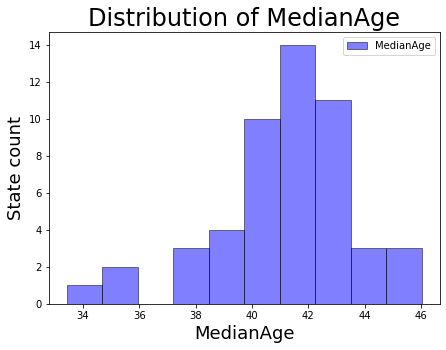

In [6]:
MedianAge_perState_groupby[MedianAge_perState_groupby['state'] > 0].MedianAge.plot(
    kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(7, 5))

plt.legend(labels=['MedianAge'])
plt.title('Distribution of MedianAge', size=24)
plt.xlabel('MedianAge', size=18)
plt.ylabel('State count', size=18)

Zgodnie z danymi raportu na stronie https://www.populationof.net/ średni wiek populacji w Stanach Zjednoczonych w roku 2020 wynosił 39.4 lat. Sprawdźmy ile stanów ma średni wiek mniejszy od przeciętnego.

Źródło: https://www.populationof.net/pl/united-states-of-america/ 

In [7]:
for index, row in MedianAge_perState_groupby.iterrows():
    if row['MedianAge'] < 39.4:  
        MedianAge_perState_groupby.loc[index,'Size'] = 'Small'
        print(index,MedianAge_perState_groupby.loc[index,'Size'])

AK Small
DC Small
GA Small
HI Small
IN Small
LA Small
MS Small
TX Small
UT Small


Wyświetlamy mape USA i zaznaczamy na mapie stany z wiekiem średnim, niższym od przeciętnego. 

In [8]:
states = gpd.read_file('s_11au16.shp')

(20.0, 75.0)

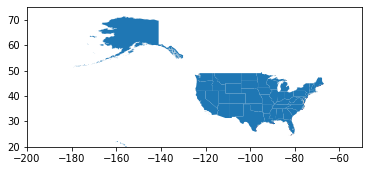

In [26]:
states.plot()
plt.xlim(-200,-50)
plt.ylim(20, 75)

In [10]:
states.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [11]:
MedianAge_perState_groupby.reset_index().head()

,Stab,state,MedianAge,Latitude,Longitude,Size
0,AK,2,35.075641,61.622001,-153.359394,Small
1,AL,1,40.268189,32.883226,-86.818078,NaN
2,AR,5,42.249915,35.135067,-92.378020,NaN
3,AZ,4,40.658897,33.700972,-111.578707,NaN
4,CA,6,39.456474,36.426736,-119.925521,NaN


In [12]:
merged_medians = pd.merge(states, MedianAge_perState_groupby, left_on = 'STATE', right_index=True, how='left')

In [13]:
merged_medians = merged_medians.drop_duplicates('NAME')

(20.0, 75.0)

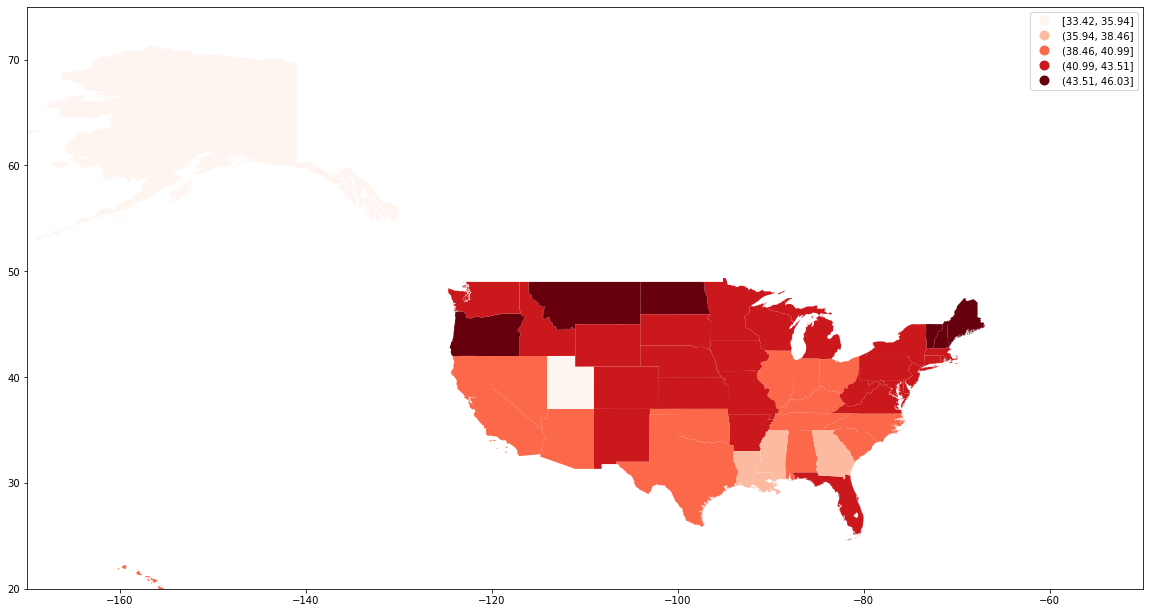

In [37]:
merged_medians.plot(column='MedianAge', legend=True, scheme='equal_interval', cmap='Reds', figsize=(20,20))
plt.xlim(-170,-50)
plt.ylim(20, 75)

Wyswietlamy wiekową strukture populacji

In [21]:
pd.set_option('display.max_rows', 500)

[0.0651442599779895, 0.06570562306629898, 0.06679233116751175, 0.07093771920613147, 0.07043141518405277, 0.13321777550315325, 0.1333626791902082, 0.14442548191943888, 0.06366449743111445, 0.05475037637902136, 0.07120650579220568, 0.04253034659530149, 0.0178309885875722]


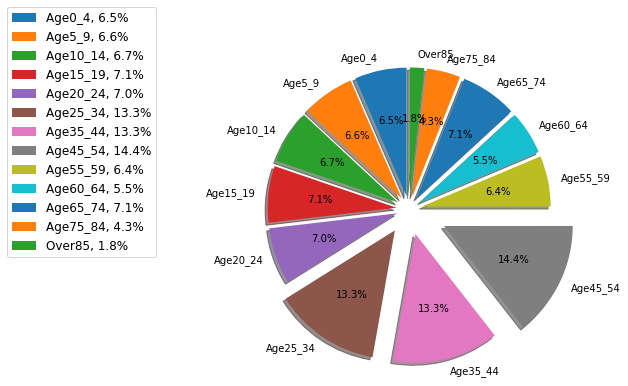

In [22]:
a = np.array(['Age0_4', 'Age5_9', 'Age10_14', 'Age15_19', 'Age20_24', 'Age25_34', 'Age35_44', 'Age45_54', 'Age55_59', 'Age60_64', 'Age65_74', 'Age75_84', 'Over85'])
y=[]
for i in a: 
    b = zipcode[[i]].to_numpy()
    c = zipcode[["TotPop"]].to_numpy()
    y.append(np.divide(sum(b),sum(c))[0])
print(y)

labels = 'Age0_4', 'Age5_9', 'Age10_14', 'Age15_19', 'Age20_24', 'Age25_34', 'Age35_44', 'Age45_54', 'Age55_59', 'Age60_64', 'Age65_74', 'Age75_84', 'Over85'

sizes = y
explode = (0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.1,0.1,0.1,0.1,0.1)  
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
total = sum(sizes)
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.show()

Przejrzyjmy się średniej wysokości zarobków w róznych stanach

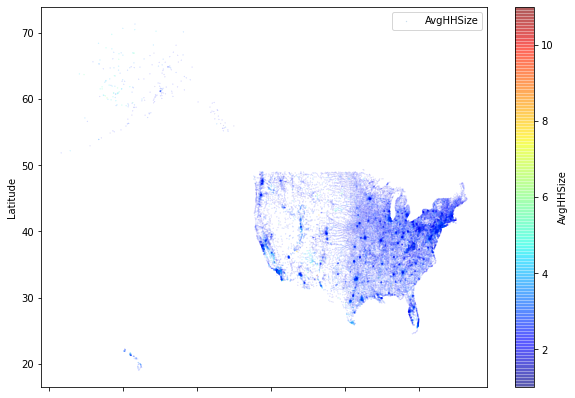

In [47]:
zipcode.plot(kind='scatter', x='Longitude', y='Latitude', alpha =0.4,
            s=zipcode['AvgHHSize']/100, label = 'AvgHHSize', figsize =(10,7),
            c='AvgHHSize',cmap=plt.get_cmap('jet'),colorbar=True,
            )
plt.legend()

Współzależność między wysokością zarobków a płcią

Text(0, 0.5, 'MedianEarnings')

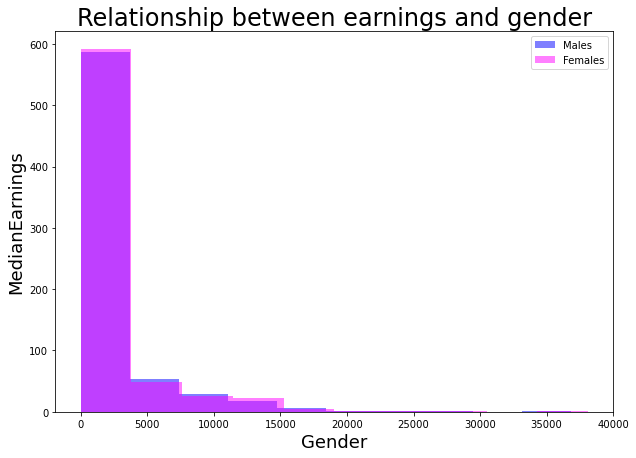

In [65]:
ax1 = zipcode[zipcode['state'] == 20].plot(
    kind='hist', x='MedianEarnings', y='Males', color='blue', alpha=0.5, figsize=(10, 7))
zipcode[zipcode['state'] == 20].plot(kind='hist', x='MedianEarnings',
                                     y='Females', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between earnings and gender', size=24)
plt.xlabel('Gender', size=18)
plt.ylabel('MedianEarnings', size=18)

Regresja liniowa pokazuje współzależność między wykształceniem a podjęciem pracy jako specjalista

In [66]:
def get_list(dataframe, prop): return dataframe[prop].values

Współczynnik determinacji: 0.8725828789084801


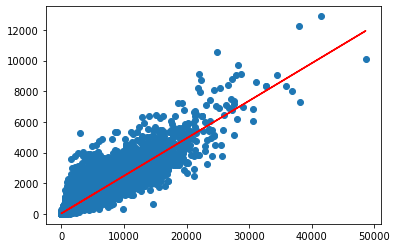

In [70]:
def linear_regression(x, y):
    X = get_list(zipcode, x).reshape(-1, 1)
    Y = get_list(zipcode, y).reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    print(f'Współczynnik determinacji: {linear_regressor.score(X, Y)}')
    
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

linear_regression(y='Professional', x='Bachelorsormore',)

ANALIZA ZAMÓWIEŃ

In [62]:
#zipcode.to_sql('zipcode', conn)
#orders.to_sql('orders', conn1)
#pd.read_sql("select state, totalprice  from orders group by state order by totalprice", con=conn1)
orders.sort_values(by='totalprice', ascending = False).head(10)

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
149792,1244054,146401,2141,2015-02-08 00:00,BOULDER,CO,80302,VI,9848.96,20,8
180903,1508125,184224,2141,2016-03-01 00:00,INDEPENDANCE,OH,44131,AE,9436.59,55,25
161864,1360162,18818,2189,2015-08-09 00:00,CLIFFSIDE PARK,NJ,7010,MC,9137.09,45,753
156604,1310162,165771,2236,2015-05-16 00:00,DEL MAR,CA,92014,AE,8830.00,38,13
144992,1206181,140377,2141,2014-11-19 00:00,SAUSALITO,CA,94965,AE,6920.32,32,17
110127,1111842,128435,2173,2014-05-21 00:00,FRANKLIN,MA,2038,VI,6920.00,12,12
59476,1061106,72141,2237,2012-12-12 00:00,BIRMINGHAM,AL,35203,DB,6780.00,1,400
185598,1568128,186835,2236,2016-05-13 00:00,NEW YORK,NY,10175,AE,6685.00,19,12
150715,1254020,145718,2236,2015-01-22 00:00,SCRANTON,PA,18510,AE,6625.00,28,13
28687,1054380,88800,2141,2012-11-12 00:00,NEW YORK,NY,10123,AE,6606.00,15,15


Sprawdzmy w których stanach najwięcej zamówień

In [45]:
# TotalPrice_State = orders[['state','totalprice']].groupby('state').count()
# TotalPrice_perState = TotalPrice_State.sort_values('totalprice',ascending=False).head(10)

# for i in TotalPrice_perState:
#     b = TotalPrice_perState[[i]]/TotalPrice_perState.sum()
#     print (b)

In [61]:
TotalPrice_State = orders[['state','totalprice']].groupby('state').count()
TotalPrice_perState = TotalPrice_State.sort_values('totalprice',ascending=False).head(10)

def i_in_top(xa):
    for i in xa:
        xb = xa[[i]]/xa.sum()
        print (xb)
    return xb

result = i_in_top(TotalPrice_perState)
result

       totalprice
state            
NY       0.375809
NJ       0.149335
CA       0.125223
FL       0.071495
CT       0.065767
PA       0.049692
MA       0.048730
TX       0.043852
IL       0.040798
VA       0.029300


,totalprice
state,
NY,0.375809
NJ,0.149335
CA,0.125223
FL,0.071495
CT,0.065767
PA,0.049692
MA,0.048730
TX,0.043852
IL,0.040798


Szukamy mista dla stanu NY, co zamawiali najwięcej

In [62]:
NY = orders.loc[orders.state == 'NY', ['city', 'totalprice']].groupby('city').sum()
Top_NY = NY.sort_values('totalprice',ascending=False).head(5)
Top_NY

result2 = i_in_top(Top_NY)
result2

               totalprice
city                     
NEW YORK         0.802898
BROOKLYN         0.119628
SCARSDALE        0.027082
BRONX            0.026022
STATEN ISLAND    0.024370


,totalprice
city,
NEW YORK,0.802898
BROOKLYN,0.119628
SCARSDALE,0.027082
BRONX,0.026022
STATEN ISLAND,0.024370


In [65]:
result2.index.to_list()

['NEW YORK', 'BROOKLYN', 'SCARSDALE', 'BRONX', 'STATEN ISLAND']

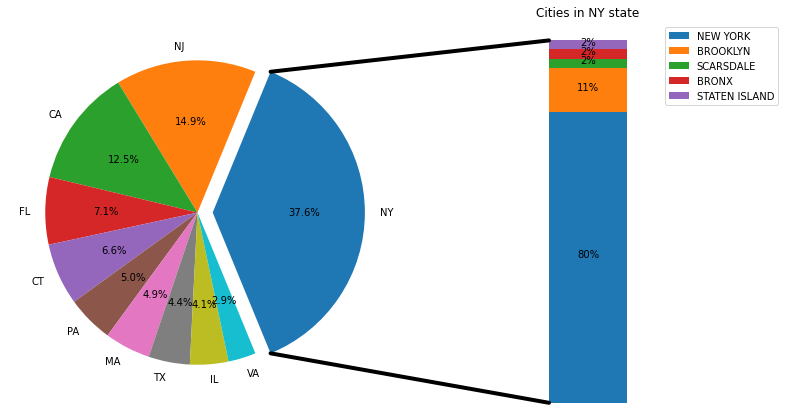

In [67]:
# make figure and assign axis objects
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = result['totalprice'].to_list()
labels = result.index.to_list()
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# rotate so that first wedge is split by t0.375809he x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, labels=labels, explode=explode, normalize=False)

# bar chart parameters

xpos = 0
bottom = 0
ratios = result2['totalprice'].to_list()
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .3], [.1, .3, .3]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom )
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Cities in NY state')
ax2.legend(result2.index.to_list())
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

Sprawdzmy jakich produktów zamówiono najwięcej

In [29]:
products.isna().sum()

PRODUCTID              0
PRODUCTNAME         4040
PRODUCTGROUPCODE       0
PRODUCTGROUPNAME       1
INSTOCKFLAG            0
FULLPRICE              0
dtype: int64

In [119]:
orders_groupname = pd.merge(
    orderlines,
    products[['PRODUCTID','PRODUCTGROUPNAME']],
    left_on='productid',
    right_on='PRODUCTID',
    how='left'
)
orders_groupname

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice,PRODUCTID,PRODUCTGROUPNAME
0,1010561,1006414,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00,10834,BOOK
1,1010562,1006541,11052,2011-01-19 00:00,2011-01-20 00:00,10.00,2,20.00,11052,ARTWORK
2,1010563,1006542,11070,2011-01-19 00:00,2011-01-20 00:00,19.12,1,19.12,11070,OCCASION
3,1010564,1010154,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,1,14.95,11196,BOOK
4,1010565,1009110,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00,11048,ARTWORK
...,...,...,...,...,...,...,...,...,...,...
286012,2017155,1643154,11012,2016-09-20 00:00,2016-09-21 00:00,16.95,1,16.95,11012,BOOK
286013,2017156,1643155,13630,2016-09-20 00:00,2016-09-21 00:00,16.14,1,16.14,13630,BOOK
286014,2017157,1643150,14028,2016-09-20 00:00,2016-09-21 00:00,22.95,1,22.95,14028,APPAREL
286015,2017158,1643156,14028,2016-09-20 00:00,2016-09-21 00:00,20.65,1,20.65,14028,APPAREL


In [51]:
product_sales = orders_groupname.groupby(['productid', 'PRODUCTGROUPNAME']).sum()[['numunits', 'totalprice']]
product_sales.head()

,,numunits,totalprice
productid,PRODUCTGROUPNAME,,
10001,CALENDAR,727,4035.00
10002,CALENDAR,364,3774.99
10003,CALENDAR,320,2865.97
10004,BOOK,34,2665.80
10005,BOOK,1773,26356.47


In [52]:
product_sales = product_sales.reset_index()

In [53]:
product_sales_no_freebie = product_sales[product_sales['PRODUCTGROUPNAME']!="FREEBIE"]

In [54]:
product_sales[product_sales['PRODUCTGROUPNAME']!="FREEBIE"].sort_values(by='numunits', ascending=False).head(10)

,productid,PRODUCTGROUPNAME,numunits,totalprice
1008,11009,ARTWORK,11647,96800.66
1167,11168,BOOK,11195,232272.25
1195,11196,BOOK,9490,97500.72
2492,12494,BOOK,9104,40775.29
2138,12139,OCCASION,8360,183098.50
1178,11179,BOOK,6025,52571.73
2508,12510,APPAREL,5283,44169.10
1175,11176,BOOK,5247,18128.08
3627,13629,BOOK,4676,123258.07
1047,11048,ARTWORK,4623,40195.96


In [55]:
product_sales_no_freebie.sort_values(by='numunits', ascending=False).head(10)

,productid,PRODUCTGROUPNAME,numunits,totalprice
1008,11009,ARTWORK,11647,96800.66
1167,11168,BOOK,11195,232272.25
1195,11196,BOOK,9490,97500.72
2492,12494,BOOK,9104,40775.29
2138,12139,OCCASION,8360,183098.50
1178,11179,BOOK,6025,52571.73
2508,12510,APPAREL,5283,44169.10
1175,11176,BOOK,5247,18128.08
3627,13629,BOOK,4676,123258.07
1047,11048,ARTWORK,4623,40195.96


In [57]:
product_sales_no_freebie.groupby('PRODUCTGROUPNAME').sum()[['numunits','totalprice']].sort_values(by='totalprice', ascending=ending=False)

,numunits,totalprice
PRODUCTGROUPNAME,,
ARTWORK,67672,9137891.64
BOOK,176853,2483487.15
OCCASION,74822,1021676.05
GAME,26880,361627.41
CALENDAR,16179,270196.64
OTHER,13372,227527.95
APPAREL,17122,206489.46


In [33]:
#orders_groupname.groupby('productid').count()['numunits']

In [15]:
orderlines.groupby('productid').count()['numunits']

productid
10001     256
10002     230
10003     172
10004      34
10005    1703
         ... 
14036       2
14037       1
14038      17
14039      43
14040       1
Name: numunits, Length: 4040, dtype: int64

In [6]:
Totalprice_per_products = orderlines.groupby('productid').count()['numunits']
Top = Totalprice_per_products.sort_values(ascending=False).head(10)
Top

productid
12820    18648
11168     9546
12139     7208
11009     5874
11196     4768
12510     4244
11088     3782
13629     3686
13190     3412
10834     3370
Name: numunits, dtype: int64

In [12]:
Top.index.to_list()

[12820, 11168, 12139, 11009, 11196, 12510, 11088, 13629, 13190, 10834]

In [13]:
products[products['PRODUCTID'].isin(Top.index.to_list())]

,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
833,10834,NaN,BK,BOOK,N,25
1008,11009,NaN,AR,ARTWORK,N,20
1087,11088,NaN,OC,OCCASION,Y,19
1167,11168,NaN,BK,BOOK,N,30
1195,11196,NaN,BK,BOOK,Y,25
2138,12139,NaN,OC,OCCASION,Y,25
2509,12510,NaN,AP,APPAREL,Y,32
2819,12820,NaN,FR,FREEBIE,N,0
3189,13190,NaN,FR,FREEBIE,Y,0
3628,13629,NaN,BK,BOOK,Y,35


In [ ]:
#orderd ['year']=  df['ArrivalDate'].dt.year
# łączysz orderlines z orders
# grupujesz po stanach i po latach (['stan', 'rok'])
# sumujesz numunits, totalprics

In [239]:
orders.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,year,Date
0,1002854,45978,2141,2009-10-13,NEWTON,MA,2459,VI,190.00,3,3,2009,2009-10-13
1,1002855,125381,2173,2009-10-13,NEW ROCHELLE,NY,10804,VI,10.00,1,1,2009,2009-10-13
2,1002856,103122,2141,2011-06-02,MIAMI,FL,33137,AE,35.22,2,2,2011,2011-06-02
3,1002857,130980,2173,2009-10-14,E RUTHERFORD,NJ,7073,AE,10.00,1,1,2009,2009-10-14
4,1002886,48553,2141,2010-11-19,BALTIMORE,MD,21218,VI,10.00,1,1,2010,2010-11-19


In [229]:
orders['orderdate'] = pd.to_datetime(orders['orderdate'])
orders['year'] = orders['orderdate'].dt.year
orders['year']

0         2009
1         2009
2         2011
3         2009
4         2010
          ... 
192978    2016
192979    2016
192980    2016
192981    2016
192982    2016
Name: year, Length: 192983, dtype: int64

In [241]:
orderlines.head()

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,1010561,1006414,10834,2011-03-07 00:00,2011-03-08 00:00,18.00,1,18.00
1,1010562,1006541,11052,2011-01-19 00:00,2011-01-20 00:00,10.00,2,20.00
2,1010563,1006542,11070,2011-01-19 00:00,2011-01-20 00:00,19.12,1,19.12
3,1010564,1010154,11196,2009-11-19 00:00,2009-11-20 00:00,14.95,1,14.95
4,1010565,1009110,11048,2009-11-11 00:00,2009-11-12 00:00,10.00,2,20.00


In [242]:
products.head()

,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [230]:
orders_orderlines = pd.merge(
    orderlines [['orderid', 'productid']],
    orders [['orderid', 'orderdate', 'state', 'year', 'totalprice']],
    how='inner', on='orderid'
)
orders_orderlines_products = pd.merge(
    orders_orderlines, 
    products [['PRODUCTID','PRODUCTGROUPNAME']], 
    left_on='productid',
    right_on='PRODUCTID',
    how='left'
)
orders_orderlines_products.head()

,orderid,productid,orderdate,state,year,totalprice,PRODUCTID,PRODUCTGROUPNAME
0,1006414,10834,2011-01-18,AL,2011,36.00,10834,BOOK
1,1006414,10842,2011-01-18,AL,2011,36.00,10842,BOOK
2,1006541,11052,2011-01-18,CT,2011,20.00,11052,ARTWORK
3,1006542,11070,2011-01-18,CT,2011,19.12,11070,OCCASION
4,1010154,11196,2009-10-30,NY,2009,14.95,11196,BOOK


In [231]:
orders_state_year = orders_orderlines_products.groupby(['state','year', 'PRODUCTGROUPNAME']).sum()[['totalprice']]
orders_state_year

totalprice
state year PRODUCTGROUPNAME            
.     2015 BOOK                   15.00
           FREEBIE               107.80
           OTHER                  53.90
AA    2011 ARTWORK                30.00
           BOOK                   22.50
...                                 ...
WY    2016 BOOK                   55.35
           FREEBIE                36.00
           OCCASION               36.00
YU    2013 BOOK                  105.03
      2014 APPAREL                15.95

[2964 rows x 1 columns]

In [232]:
orders_state_year = orders_state_year.reset_index()

In [233]:
DataFrame = orders_state_year[orders_state_year['PRODUCTGROUPNAME']!="FREEBIE"].sort_values(by='totalprice', ascending=False).head(10)
DataFrame.head()

,state,year,PRODUCTGROUPNAME,totalprice
1963,NY,2015,ARTWORK,1897842.04
1955,NY,2014,ARTWORK,1268737.00
1971,NY,2016,ARTWORK,1077522.34
1948,NY,2013,ARTWORK,823609.22
365,CA,2015,ARTWORK,709694.60


In [234]:
NY1 = DataFrame.loc[DataFrame.state == 'NY', ['year', 'totalprice', 'PRODUCTGROUPNAME']].groupby('year').sum()
Top_NY1 = NY1.sort_values('totalprice',ascending=False).head(10)
Top_NY1

for i in Top_NY1:
    k1 = Top_NY1[[i]]/Top_NY1.sum()
    print (k1)
k1.index.to_list()
k1['totalprice'].to_list()

      totalprice
year            
2015    0.338207
2014    0.226097
2016    0.192021
2013    0.146772
2012    0.096903


[0.33820716280599894,
 0.22609676257197556,
 0.19202113020506242,
 0.14677224536403738,
 0.09690269905292558]

<BarContainer object of 5 artists>

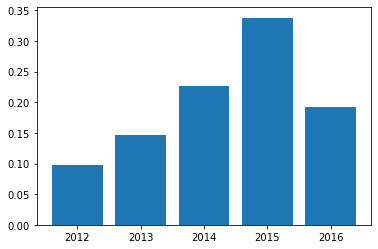

In [235]:
plt.bar(x=k1.index.to_list(),
        height=k1['totalprice'].to_list())

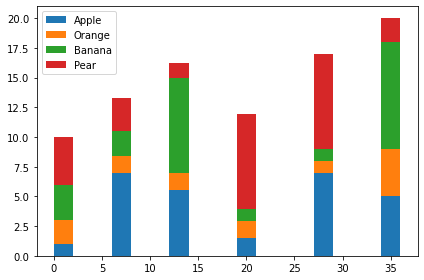

In [236]:
df = pd.DataFrame([[1, 2, 3, 4], [7, 1.4, 2.1, 2.8], [5.5, 1.5, 8, 1.2],
                   [1.5, 1.4, 1, 8], [7, 1, 1, 8], [5, 4, 9, 2]],
                  columns=['Apple', 'Orange', 'Banana', 'Pear'],
                  index=[1, 7, 13, 20, 28, 35])
width = 2
bottom = 0
 
for i in df.columns:
    plt.bar(df.index, df[i], width=width, bottom=bottom)
    bottom += df[i]
 
plt.legend(df.columns)
plt.tight_layout()
 
# Display the graph on the screen
plt.show()

ANALIZA KLIENTÓW

Szukamy klientów, którzy kupili najwięcej

In [47]:
Top_customer = orders.groupby('customerid').sum()['totalprice']
Top_customers = Top_customer.sort_values(ascending=False).head(10)
Top_customers

customerid
0         312256.68
146401      9848.96
184224      9436.59
18818       9137.09
165771      8830.00
140377      6920.32
128435      6920.00
72141       6780.00
186835      6685.00
145718      6625.00
Name: totalprice, dtype: float64

Sprawdzmy płeć klientów, co kupili najwięcej

In [48]:
Top_customers.index.to_list()
customers[customers['customerid'].isin(Top_customers.index.to_list())]

,customerid,householdid,gender,firstname
16601,184224,57035861,M,JAMES
21055,186835,57750341,M,CHRISTOPH
98512,72141,36213550,F,HOLLY
154732,128435,36213508,M,ANTHONY
171424,140377,45334058,M,SCOTT
176007,146401,18442778,M,JOHN
176916,145718,48765412,F,LEAR
182628,165771,51035891,M,JOHN
187517,18818,19304387,F,CAROL


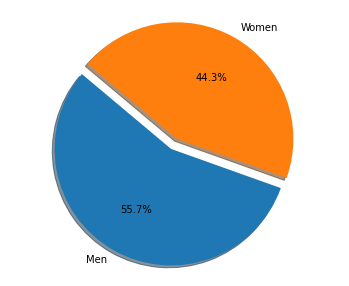

In [46]:
men = customers['gender'].str.count('M')
women = customers['gender'].str.count('F')
f = women.sum()/(women.sum()+men.sum())
m = men.sum()/(women.sum()+men.sum())

labels = 'Men', 'Women'
sizes = [m,f]
explode = (0.1, 0)  
fig1, ax1 = plt.subplots(figsize=(6, 5))

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()